In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [276]:
df = pd.read_csv('Online_Retail.csv')

## Data Cleaning

### Data Exploration

In [277]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [279]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [280]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Handle Missing Values

In [281]:
df = df.dropna(subset=['CustomerID'])

### Remove Dublicates

In [282]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 5225


In [283]:
initial_shape = df.shape
df = df.drop_duplicates()
final_shape = df.shape
print(f"Dropped {initial_shape[0] - final_shape[0]} duplicate rows.")

Dropped 5225 duplicate rows.


### Handle Cancellations

*Cancellation handling removes negative quantities from the data*

In [284]:
cancellations = df[df['InvoiceNo'].str.startswith('C')]
print(f"Number of cancellations: {cancellations.shape[0]}")

Number of cancellations: 8872


In [285]:
df = df[~df['InvoiceNo'].str.startswith('C')]

### Change Data Types

In [286]:
df = df.copy() # Create a full copy of the DataFrame to avoid the warning
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype(int)

### Feature Engineering

In [287]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

### Final Cleaned Data

In [288]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  int32         
 7   Country      392732 non-null  object        
 8   TotalPrice   392732 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 28.5+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


## Exploratory Data Analysis (EDA)

#### Sales Over Time

In [289]:
# Set InvoiceDate as index
df.set_index('InvoiceDate', inplace=True)

In [290]:
# Resample to monthly sales
monthly_sales = df['TotalPrice'].resample('ME').sum()

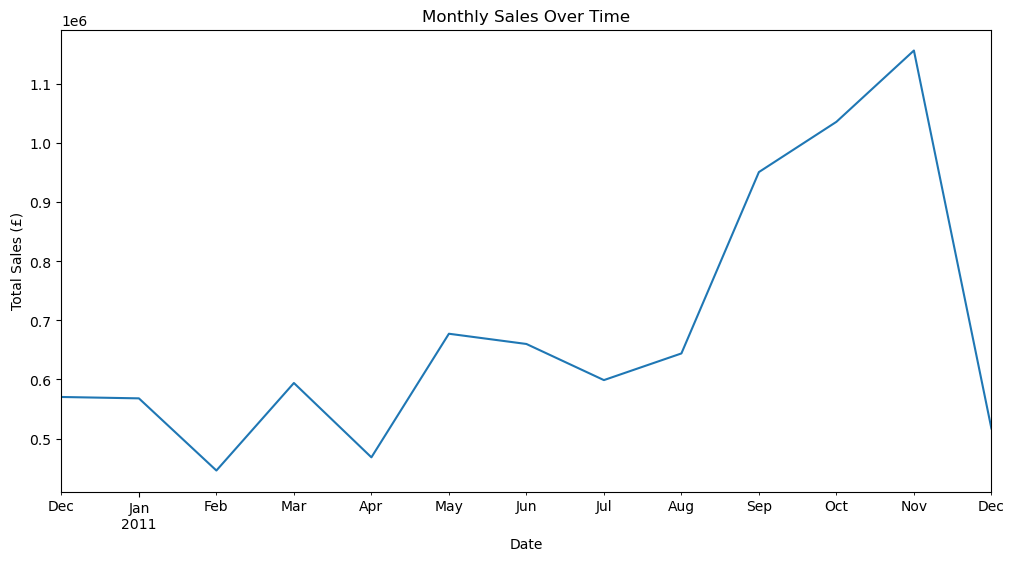

In [291]:
plt.figure(figsize=(12,6))
monthly_sales.plot()
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales (£)')
plt.show()

#### Sales by Weekday

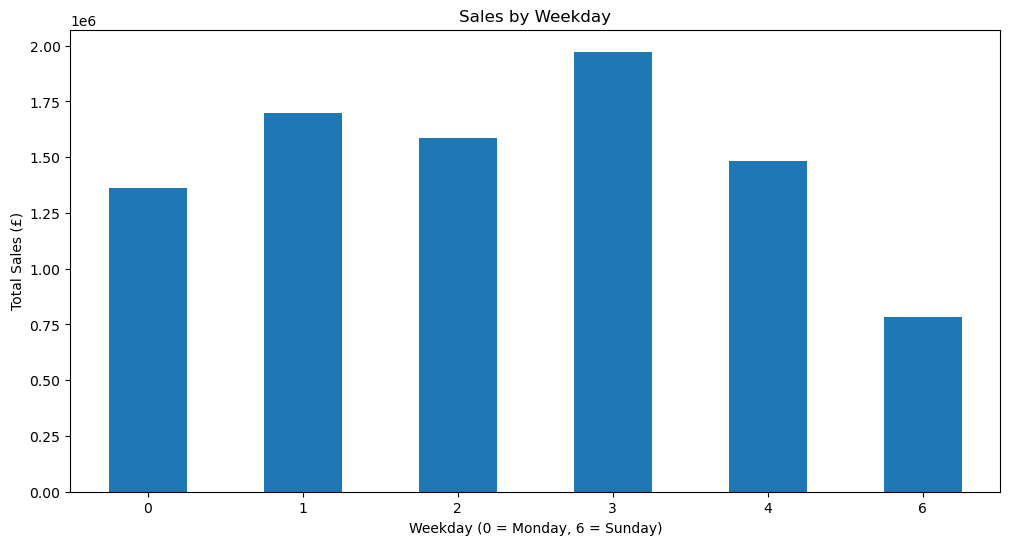

In [292]:
weekday_sales = df.groupby(df.index.weekday)['TotalPrice'].sum()

# Plot weekday sales
plt.figure(figsize=(12,6))
weekday_sales.plot(kind='bar')
plt.title('Sales by Weekday')
plt.xlabel('Weekday (0 = Monday, 6 = Sunday)')
plt.ylabel('Total Sales (£)')
plt.xticks(rotation=0)
plt.show()

#### Sales by Hour in a Day

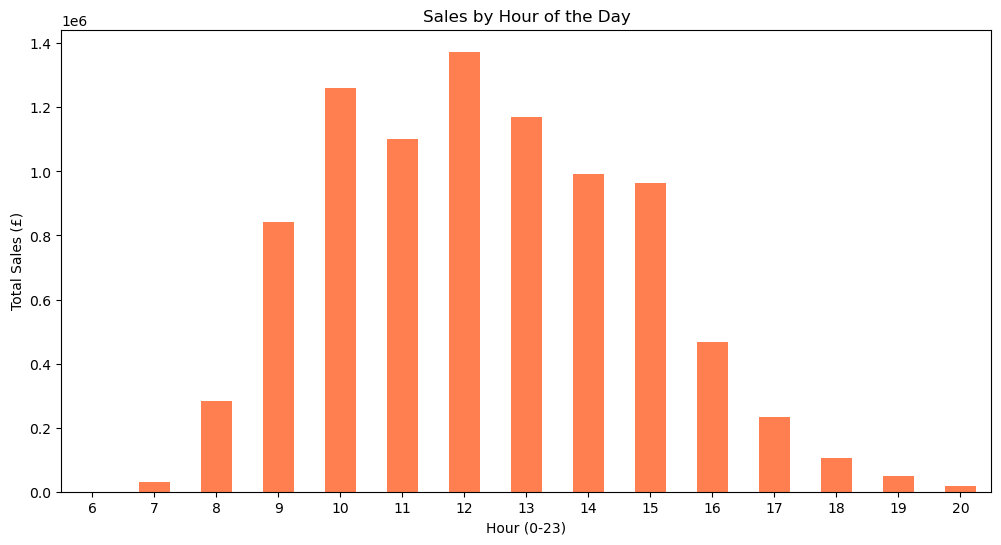

In [293]:
# Group by hour of the day (0-23)
hourly_sales = df.groupby(df.index.hour)['TotalPrice'].sum()

# Plot hourly sales
plt.figure(figsize=(12,6))
hourly_sales.plot(kind='bar', color='coral')
plt.title('Sales by Hour of the Day')
plt.xlabel('Hour (0-23)')
plt.ylabel('Total Sales (£)')
plt.xticks(rotation=0)
plt.show()

#### Top Selling Products

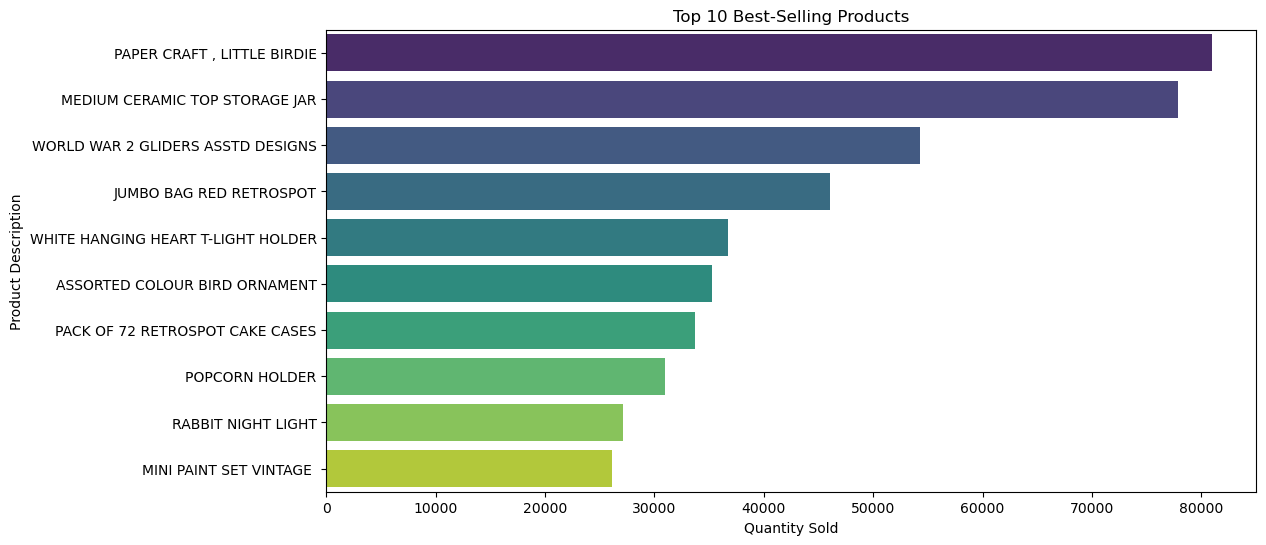

In [294]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index,hue=top_products.index, palette='viridis',dodge=False, legend=False)
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Description')
plt.show()

#### Customer Distribution by Country

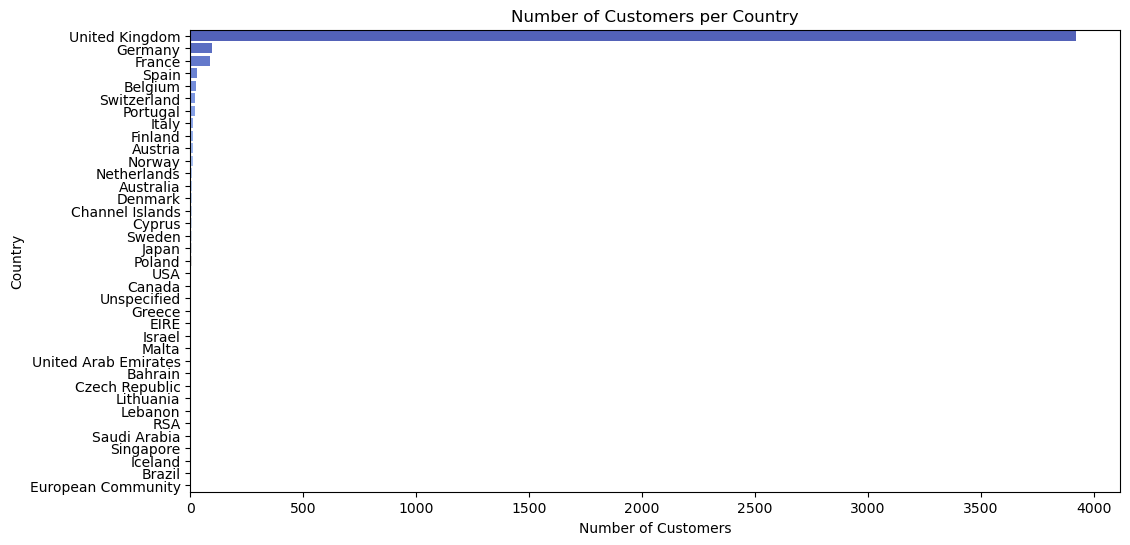

In [295]:
customers_per_country = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=customers_per_country.values, y=customers_per_country.index,hue=customers_per_country.index, palette='coolwarm',dodge=False, legend=False)
plt.title('Number of Customers per Country')
plt.xlabel('Number of Customers')
plt.ylabel('Country')
plt.show()

In [296]:
customers_table = customers_per_country.reset_index()
customers_table.columns = ['Country', 'Number of Customers']
customers_table.head()

,Country,Number of Customers
0,United Kingdom,3921
1,Germany,94
2,France,87
3,Spain,30
4,Belgium,25


#### RFM Analysis

*Calculate Recency, Frequency, and Monetary value for each customer.*

In [297]:
latest_date = df.index.max() + dt.timedelta(days=1)

# Reset the index to make 'InvoiceDate' a column again
df_reset = df.reset_index()

# RFM Metrics
rfm = df_reset.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})

# Rename columns
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace=True)

rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,326,1,77183.60
12347,2,7,4310.00
12348,75,4,1797.24
12349,19,1,1757.55
12350,310,1,334.40


In [298]:
rfm.describe()

,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000
mean,92.518322,4.271952,2048.215924
std,100.009747,7.705493,8984.248352
min,1.000000,1.000000,0.000000
25%,18.000000,1.000000,306.455000
50%,51.000000,2.000000,668.560000
75%,142.000000,5.000000,1660.315000
max,374.000000,210.000000,280206.020000


#### Visualization of RFM Distributions

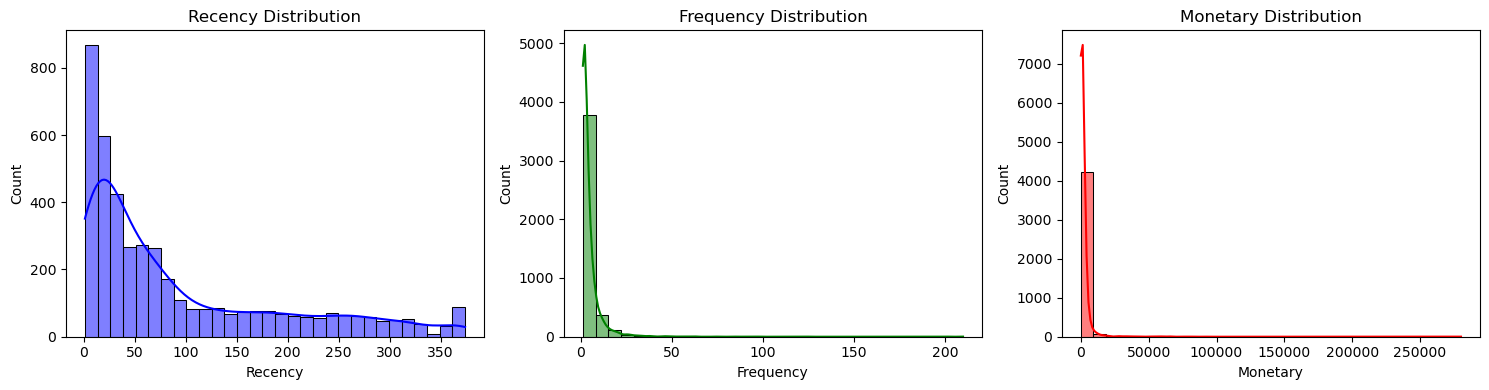

In [299]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.histplot(rfm['Recency'], bins=30, kde=True, color='blue')
plt.title('Recency Distribution')

plt.subplot(1,3,2)
sns.histplot(rfm['Frequency'], bins=30, kde=True, color='green')
plt.title('Frequency Distribution')

plt.subplot(1,3,3)
sns.histplot(rfm['Monetary'], bins=30, kde=True, color='red')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()


## Customer Segmentation 

*Using the RFM metrics, we will segment customers using K-Means clustering.*

#### Prepare RFM Data

In [300]:
# Remove outliers for better clustering
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

rfm_clean = remove_outliers(rfm, 'Recency')
rfm_clean = remove_outliers(rfm_clean, 'Frequency')
rfm_clean = remove_outliers(rfm_clean, 'Monetary')

rfm_clean.describe()

,Recency,Frequency,Monetary
count,3605.000000,3605.000000,3605.000000
mean,91.570042,2.725104,810.283097
std,89.473775,2.078815,700.492743
min,1.000000,1.000000,0.000000
25%,22.000000,1.000000,285.890000
50%,57.000000,2.000000,576.900000
75%,144.000000,4.000000,1138.000000
max,327.000000,11.000000,3029.870000


#### Scale the RFM features for K-Means.

In [301]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_clean)

#### Determine Optimal Number of Clusters (k)
The Elbow Method and Silhouette Score are used to determine the optimal number of clusters (k) for the K-Means algorithm.

- **Elbow Method:** Plots the Within-Cluster Sum of Squares (WCSS) for different values of k. The optimal k is where the "elbow" (a significant bend) occurs, indicating diminishing returns in reducing WCSS by increasing clusters.
- **Silhouette Score:** Measures the quality of clustering for each k. A higher Silhouette Score indicates better-defined clusters. We choose k where the score is maximized.

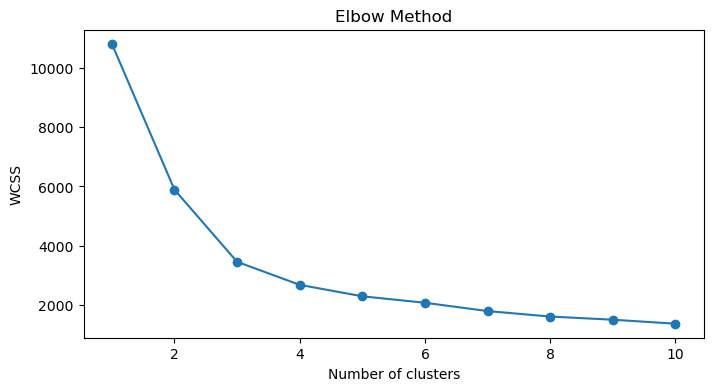

For n_clusters = 2, the Silhouette Score is 0.4447
For n_clusters = 3, the Silhouette Score is 0.4533
For n_clusters = 4, the Silhouette Score is 0.4101
For n_clusters = 5, the Silhouette Score is 0.3946
For n_clusters = 6, the Silhouette Score is 0.3956
For n_clusters = 7, the Silhouette Score is 0.3631
For n_clusters = 8, the Silhouette Score is 0.3457
For n_clusters = 9, the Silhouette Score is 0.3182
For n_clusters = 10, the Silhouette Score is 0.3273


In [302]:
# Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Silhouette Score
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(rfm_scaled)
    score = silhouette_score(rfm_scaled, cluster_labels)
    print(f"For n_clusters = {k}, the Silhouette Score is {score:.4f}")


#### K-Means Clustering

In [303]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
rfm_clean['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Inverse scaling for interpretation
rfm_clean[['Recency', 'Frequency', 'Monetary']] = scaler.inverse_transform(rfm_scaled)

#### Profile Each Segment

In [304]:
cluster_profile = rfm_clean.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)

cluster_profile.columns = ['Recency_mean', 'Frequency_mean', 'Monetary_mean', 'Count']

revenue_by_cluster = rfm_clean.groupby('Cluster')['Monetary'].sum()
total_revenue = revenue_by_cluster.sum()
rev_percent = (revenue_by_cluster / total_revenue) * 100
cluster_profile['Revenue_Percent'] = rev_percent.round(2)

cluster_profile

,Recency_mean,Frequency_mean,Monetary_mean,Count,Revenue_Percent
Cluster,,,,,
0,49.5,2.0,556.0,1880,35.78
1,37.2,5.7,1844.4,819,51.71
2,227.9,1.5,403.2,906,12.51


#### RFM Feature Distributions by Cluster

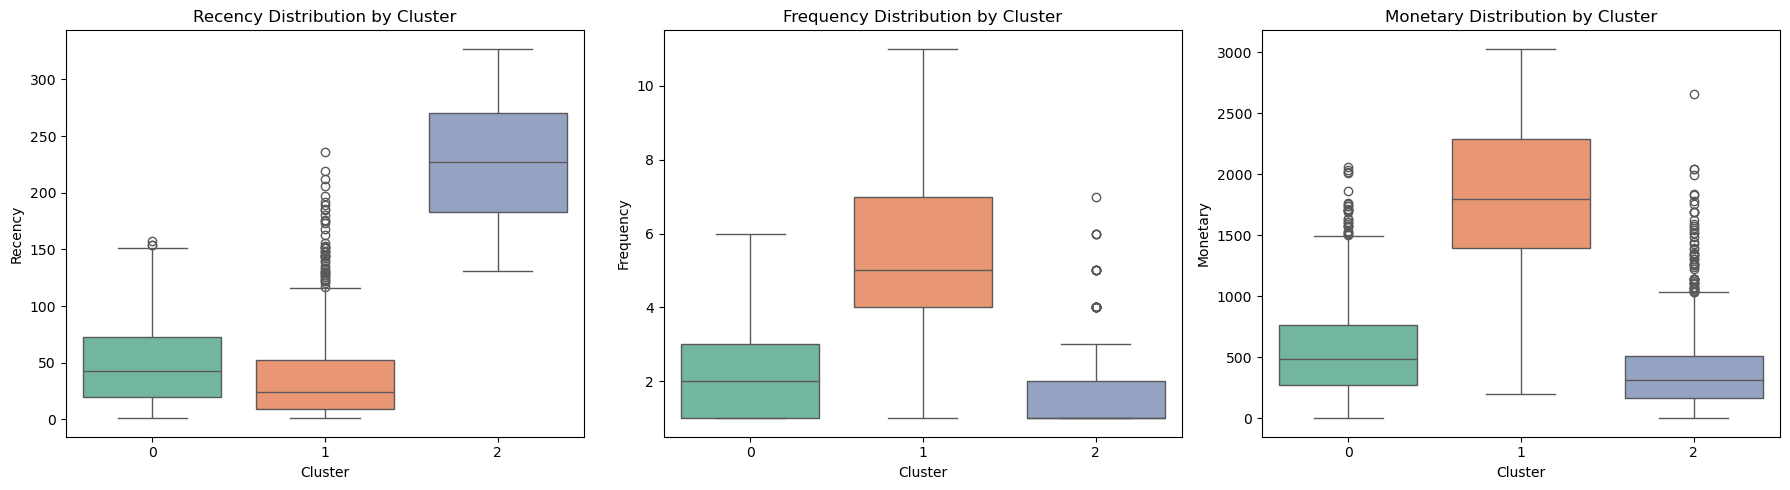

In [305]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.boxplot(x='Cluster', y='Recency',hue='Cluster', data=rfm_clean, ax=axes[0],palette='Set2',legend=False)
axes[0].set_title('Recency Distribution by Cluster')

sns.boxplot(x='Cluster', y='Frequency', hue='Cluster', data=rfm_clean, ax=axes[1],palette='Set2',legend=False)
axes[1].set_title('Frequency Distribution by Cluster')

sns.boxplot(x='Cluster', y='Monetary', hue='Cluster', data=rfm_clean, ax=axes[2],palette='Set2',legend=False)
axes[2].set_title('Monetary Distribution by Cluster')


plt.tight_layout()
plt.show()

#### Visualize Clusters Using PCA

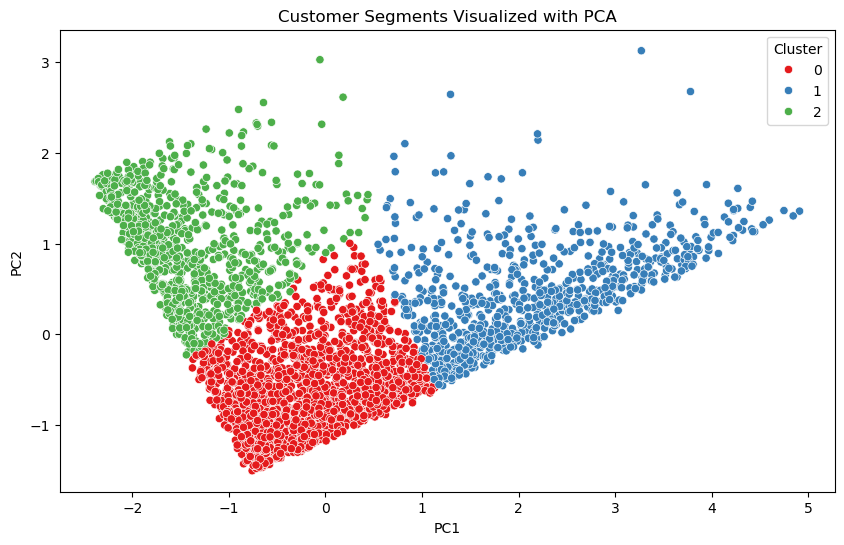

In [306]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(rfm_scaled)
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = rfm_clean['Cluster'].values

plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1')
plt.title('Customer Segments Visualized with PCA')
plt.show()

### RFM-Based Clustering Analysis

The RFM-based clustering effectively segments customers into three distinct groups:

- **Cluster 1**: Represents the core loyal and high-spending customers, crucial for sustaining revenue.
- **Cluster 0**: Includes customers with moderate engagement, offering opportunities for growth through increased engagement.
- **Cluster 2**: Includes inactive or low-spending customers, presenting challenges for re-engagement but also opportunities to reclaim lost revenue.

---


### Comparative Insights Between Clusters
#### Cluster Size vs. Revenue Contribution

- **Cluster 1**:
  - **Size**: 819 customers
  - **Revenue Share**: 51.71%
  - **Implication**: High concentration of revenue within a relatively small customer base emphasizes the importance of this segment.

- **Cluster 0**:
  - **Size**: 1,880 customers
  - **Revenue Share**: 35.78%
  - **Implication**: While individual customers contribute moderately, their large numbers make them significant contributors.

- **Cluster 2**:
  - **Size**: 906 customers
  - **Revenue Share**: 12.51%
  - **Implication**: Despite a considerable number of customers, their low engagement and spending require targeted re-engagement strategies.

---

### Revenue per Customer

- **Cluster 1**:
  - **Average Revenue per Customer**: 1,844.4 units
  - **Significance**: Highest average spending, indicating these customers are highly valuable.

- **Cluster 0**:
  - **Average Revenue per Customer**: 556.0 units
  - **Significance**: Moderate spenders; strategies to increase their purchase frequency or value could boost revenue.

- **Cluster 2**:
  - **Average Revenue per Customer**: 403.2 units
  - **Significance**: Lowest spenders; may require cost-effective re-engagement tactics.
